# Exploring Image Transforms

Pytorch's library `torchvision` has a whole array of [well documented](https://pytorch.org/docs/master/torchvision/transforms.html) image transform functions.  In this notebook, we'll take a look at how we can use the sconce [DataGenerator](https://davidlmorton.github.io/pytorch-sconce/data_generator.html#datagenerator) to see how images look when transformed.

### If on google colab

In [ ]:
!pip install --process-dependency-links pytorch-sconce==0.10.3
!pip install --no-cache-dir -I Pillow==5.0.0

In [1]:
import sconce
print(f"Notebook run using pytorch-sconce version: {sconce.__version__}")

Notebook run using pytorch-sconce version: 0.10.3


## Download the cats and dogs data

Fetch the data from fast.ai servers, if you don't have it downloaded already.

In [2]:
import os

if not os.path.exists('data'):
    !mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/
else:
    print("Data already downloaded, skipping...")

Data already downloaded, skipping...


## Plotting transforms

First we build up the composite transform out of individual transform functions.
Then we hand that composite transform function to the DataGenerator's constructor.
Finally, we use the `plot_transforms` method to visualize the effects of the transforms on an image.
Note how the transformed images are note the same size (in pixels) even though they appear the same size on the screen.

It's clear that they all look like dogs, but it's really unlikely we'll ever encounter upside-down dogs in real life, so maybe we should take the `RandomVerticalFlip` transform out.

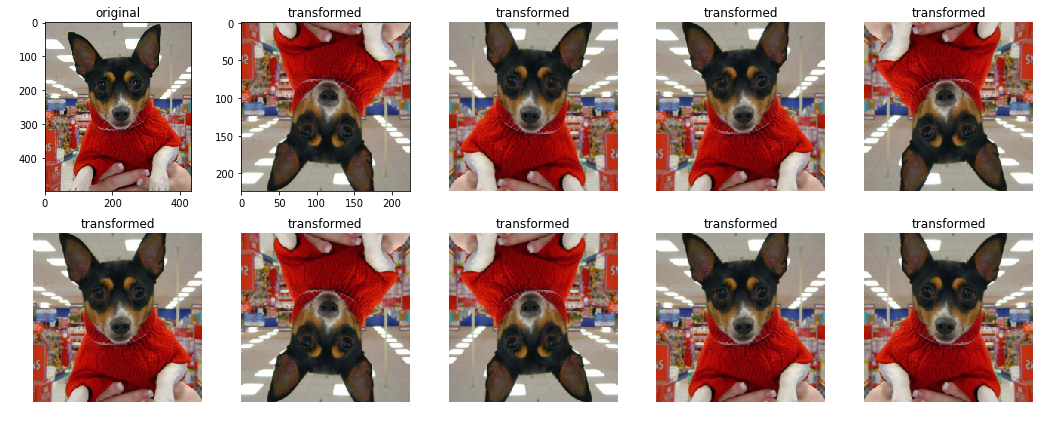

In [3]:
from sconce.data_generators import SingleClassImageDataGenerator
from torchvision import transforms

image_size = 224
composite_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.0], std=[1.0])
])

data_generator = SingleClassImageDataGenerator.from_image_folder(
    root='data/dogscats/valid', transform=composite_transform)
data_generator.plot_transforms(index=1242, num_samples=10)

## Interactively setting transform parameters

Some of the parameters of tranform functions are a little bit hard to understand.
By visualizing them interactively we can get a better idea of "reasonable" values for these parameters.

In [4]:
from ipywidgets import interact, Layout
import ipywidgets as widgets

def show_transforms(index, num_samples=10, horizontal_flip=0.0, vertical_flip=0.0, 
                    image_size=224, scale=(0.08, 1.0), ratio=(0.75, 1.33)):
    composite_transform = transforms.Compose([
        transforms.RandomVerticalFlip(vertical_flip),
        transforms.RandomHorizontalFlip(horizontal_flip),
        transforms.RandomResizedCrop(image_size, scale=scale, ratio=ratio),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.0], std=[1.0])
    ])

    data_generator = SingleClassImageDataGenerator.from_image_folder(
        root='data/dogscats/valid', transform=composite_transform)
    data_generator.plot_transforms(index, num_samples=num_samples)
    
# show some interactive widgets that let us play around with different values.
interact(show_transforms,
         index=widgets.IntText(181),
         horizontal_flip=(0.0, 1.0, 0.1),
         vertical_flip=(0.0, 1.0, 0.1),
         scale=widgets.FloatRangeSlider(value=[0.08, 1.0], min=0.01, max=1.0, continuous_update=False,
                                       layout=Layout(width='90%')),
         ratio=widgets.FloatRangeSlider(value=[0.75, 1.33], min=0.1, max=5.0, continuous_update=False,
                                       layout=Layout(width='90%')));

interactive(children=(IntText(value=181, description='index'), IntSlider(value=10, description='num_samples', …